The null hypothesis (H0) of ANOVA is that there is no difference among group means. 

The alternative hypothesis (Ha) is that at least one group differs significantly from the overall mean of the dependent variable.

If you only want to compare two groups, use a t test instead.

If any of the group means is significantly different from the overall mean, then the null hypothesis is rejected.

In [ ]:
# NAME OF TEST - ANOVA
# TEST-STAT - F-RATIO
# IT FOLLOWS F-DISTRIBUTION

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from scipy.stats import f_oneway

In [3]:
from scipy.stats import chisquare

In [ ]:
# WHEN F-RATIO IS HIGH, P-VALUE IS LOW / REJECT NULL HYPOTHESIS
# WHEN F-RATIO IS LOW , P-VALUE IS HIGH / ACCEPT NULL HYPOTHESIS

In [5]:
data = pd.read_csv('aerofit_treadmill.csv')

In [4]:
data.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [6]:
kp281 = data[data['Product']=='KP281']['Income']
kp281

0     29562
1     31836
2     30699
3     32973
4     35247
      ...  
75    53439
76    57987
77    60261
78    56850
79    64809
Name: Income, Length: 80, dtype: int64

In [7]:
kp481 = data[data['Product']=='KP481']['Income']
kp481.head(2)

80    31836
81    32973
Name: Income, dtype: int64

In [8]:
kp781 = data[data['Product']=='KP781']['Income']
kp781.head(2)

140    48658
141    54781
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='Density'>

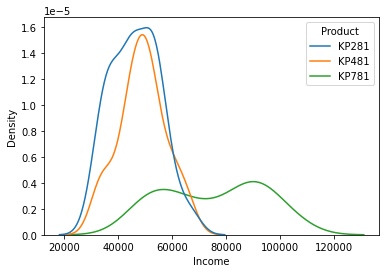

In [9]:
sns.kdeplot(data=data,x='Income',hue='Product')

In [ ]:
# Ho = ALL PRODUCT HAVE SAME INCOME MEAN
# hA = ATLEAST ONE OR MORE PRODUCT HAVE DIFFERENT INCOME MEAN

In [10]:
f_stat,pvalue =  f_oneway(kp281,kp481,kp781)

In [13]:
f_stat,pvalue

(89.25903546601671, 1.5644991316342494e-27)

In [15]:
alpha = 0.05

In [17]:
if pvalue<alpha:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

reject null hypothesis


#### ASSUMPTIONS OF ANOVA:
- ALL GROUP HAVE NORMAL DISTRIBUTION - USE: QQ-PLOT OR SHAPIRO-WILK-TEST TO CHECK FOR NORMALITY
- ALL HAVE INDEPENDENT VARIABLE -
- ALL GROUP HAVE EQUAL VARIANCE - USE LEVENE-TEST TO CHECK FOR EQUALITY OF VARIANCE

#### IF ANY ASSUMPTION FAILS, THEN USE KRUSKAL. IT WORKS BEST IF SAMPLE IS BETWEEN 100-200. 

#### 1ST ASSUMPTION: ALL HAVE NORMAL DISTRIBUTION

In [18]:
data = pd.read_csv('weight-height.csv')
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [19]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<AxesSubplot:xlabel='Height', ylabel='Count'>

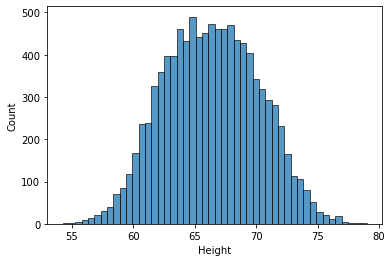

In [22]:
height = data['Height']
sns.histplot(data=height)

#### TO CHECK IF DATA IS NORMAL DISTRIBUTION OR NOT

#### 1ST WAY

In [24]:
# import qq plot
from statsmodels.graphics.gofplots import qqplot

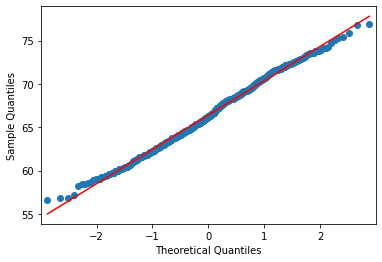

In [28]:
qqplot(data['Height'].sample(500),line='s')
plt.show()

In [ ]:
# if most points are on the red line, it means that it is almost close to normal distribution.

#### 2ND WAY

#### SHAPIRO-WILK TEST

In [ ]:
# TEST WORKS BEST IF SAMPLE IS BETWEEN (50-200)

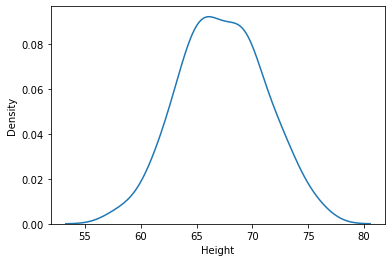

In [31]:
s_height = height.sample(100)
sns.kdeplot(data=s_height)
plt.show()

In [ ]:
# IT LOOKS LIKE NORMAL, BUT HOW MUCH NORMAL. 

In [ ]:
# H0 = normal
# Ha = not normal


# if data is normal we expect p-value to be high
alpha = 0.05

# if p = 0.03
# then it should be not normal

In [32]:
from scipy.stats import shapiro

In [37]:
tstat,pvalue = shapiro(s_height)

In [38]:
tstat,pvalue

(0.9942134022712708, 0.9493476748466492)

In [ ]:
# since p-value is higher than alpha, we should accept null hypothesis and confirm it is normal.

#### 2ND ASSUMPTION : EQUAL VARIANCE IN DIFFERENT GROUP

- LEVENE TEST

In [39]:
from scipy.stats import levene

In [ ]:
# H0 : distribution have equal variance
# Ha : distribution have unequal variance

<AxesSubplot:xlabel='Height', ylabel='Count'>

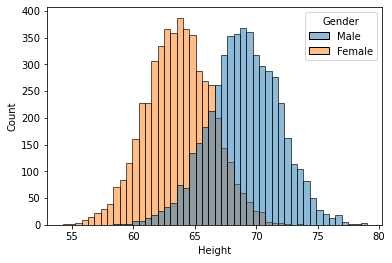

In [41]:
sns.histplot(data=data,x=data['Height'],hue='Gender')

<AxesSubplot:xlabel='Height', ylabel='Density'>

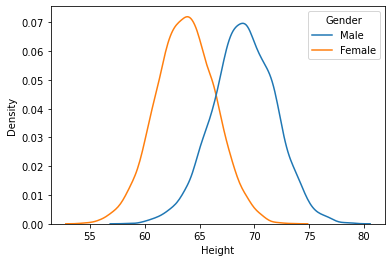

In [42]:
sns.kdeplot(data=data,x=data['Height'],hue='Gender')

In [43]:
men_height = data[data['Gender']=='Male']['Height']
women_height = data[data['Gender']=='Female']['Height']

In [44]:
men_height.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [45]:
women_height.head()

5000    58.910732
5001    65.230013
5002    63.369004
5003    64.479997
5004    61.793096
Name: Height, dtype: float64

In [ ]:
# H0 : distribution have equal variance
# Ha : distribution have unequal variance

In [46]:
from scipy.stats import levene

In [47]:
alpha = 0.05
stat,pvalue = levene(men_height,women_height)

In [48]:
stat,pvalue

(12.284910854677701, 0.0004586349895436178)

In [ ]:
# since pvalue is very low, reject null hypothesis / variance are different. 

In [49]:
# testing for these 3 products
#one of the variance must be diffeent.

levene(kp281,kp481,kp781)

LeveneResult(statistic=38.36776096611407, pvalue=1.4384394862120984e-14)

### KRUSKAL

#### IF ASSUMPTIONS OF ANOVA FAILS THEN USE KRUSKAL

In [50]:
from scipy.stats import kruskal

In [51]:
kruskal(kp281,kp481,kp781)

KruskalResult(statistic=61.43670384567185, pvalue=4.562357014275808e-14)

In [ ]:
# null hypothesis of anova and kruskal are same

### ASSIGNMENT

In [ ]:
# Q1

In [56]:
alpha = 0.05
# H0: no difference
# Ha: atleast one of them are different

In [54]:
a = [13, 8, 11, 12, 11]
b = [15, 10, 16, 11, 13, 10]
c = [5, 11, 9, 5]
d = [8, 10, 6, 5, 7]

In [55]:
f_oneway(a,b,c,d)

F_onewayResult(statistic=6.324748040313554, pvalue=0.0049302919205628576)

In [ ]:
# since pvalue is lower than alpha, reject H0 / atleast one of them are different

In [ ]:
# Q2

In [57]:
one_star = [382, 391, 335, 368, 400, 372]
two_star = [560, 343, 512, 329, 391, 367]
three_star = [384, 458, 409, 309, 374, 459]
four_star = [325, 390, 304, 240, 306, 169]
five_star = [360, 298, 272, 368, 320, 326]

In [59]:
tstat,pvalue =  f_oneway(one_star,two_star,three_star,four_star,five_star)

In [60]:
alpha = 0.01
# H0 : they are same
# Ha : atleast one of them are different

In [66]:
if pvalue < alpha:
    print(f'pvalue is {pvalue} therefore, reject null hypothesis.\nAtleast one of them are different')
else:
    print('cant reject null hypothesis. \n they are same')

pvalue is 0.009362001936328837 therefore, reject null hypothesis.
Atleast one of them are different


In [ ]:
# Q3

In [67]:
Brand_A = [19.60, 18.82, 19.00, 18.45, 19.79, 19.03, 17.89, 19.42]
Brand_B = [21.10, 20.00, 20.43, 19.67, 18.99, 19.98, 20.14, 19.78]
Brand_C = [10.31, 10.02, 9.41, 9.89, 10.05, 10.52, 11.02, 10.42]
Brand_D = [17.02, 16.71, 17.78, 18.65, 15.98, 17.63, 17.00, 16.78, 16.92, 17.14]

In [68]:
t_stat,pvalue = f_oneway(Brand_A,Brand_B,Brand_C,Brand_D)

In [69]:
 alpha = 0.05
# H0 : all are same
# Ha : atleast one of them are different

In [70]:
if pvalue<alpha:
    print(f'pvalue is {pvalue} therefore, reject null hypothesis.\nAtleast one of them are different')
else:
    print('cant reject null hypothesis. \n they are same')

pvalue is 2.392149441499325e-24 therefore, reject null hypothesis.
Atleast one of them are different


In [ ]:
# Q4

In [73]:
cars = [19.9, 15.3, 2.2, 6.8, 34.2, 8.3, 12.0, 7.0, 9.5, 1.1]
buses = [1.8, 24.6, 7.2, 37.0, 7.2, 21.2, 6.5, 23.6]
trucks = [13.3, 23.0, 25.4, 15.3, 57.1, 14.5, 26.0]

In [74]:
0.07/2

0.035

In [75]:
from scipy.stats import norm

In [76]:
norm.ppf(0.035)

-1.8119106729525978

In [78]:
tstat,pvalue = f_oneway(cars,buses,trucks)

In [79]:
tstat,pvalue

(2.4686944536875277, 0.10782985675757563)

In [80]:
alpha = 0.07

In [81]:
if pvalue<alpha:
    print(f"pvalue is {pvalue}. Therefore reject null hypothesis")
else:
    print('accept null hypothesis')

accept null hypothesis


In [ ]:
# Q5

In [82]:
college_students = [71, 62, 63, 59, 67, 68, 63, 62, 66, 65, 61, 60]
athletes = [67, 68, 72, 66, 65, 69, 71, 70, 65, 64, 68]
army = [68, 67, 66, 68, 69, 70, 71, 69, 66, 67]

In [83]:
alpha = 0.01
# H0 : they are same
# Ha : atleast one of them are different

In [84]:
tstat,pvalue = f_oneway(college_students,athletes,army)

In [85]:
tstat,pvalue

(7.899836075209478, 0.0017534092082519943)

In [86]:
if pvalue<alpha:
    print(f"pvalue is {pvalue}. \nReject null hypothesis")
else:
    print("accept null hypothesis")

pvalue is 0.0017534092082519943. 
Reject null hypothesis


In [ ]:
# Q6 CHISQUARE TEST

In [87]:
150*30/100

45.0

In [89]:
0.4*150

60.0

In [90]:
0.3*150

45.0

In [92]:
exp = [45,60,45]
obs = [45,50,55]

In [96]:
tstat,pvalue = chisquare(obs,exp)

In [97]:
tstat,pvalue

(3.8888888888888893, 0.1430666827544082)

In [95]:
alpha = 0.05
# H0 : same
# Ha : not same

In [98]:
if pvalue<alpha:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

accept null hypothesis


In [ ]:
# Q7

In [100]:
0.2*200,0.5*200,0.3*200

(40.0, 100.0, 60.0)

In [103]:
obs = [30,85,85]
exp = [40,100,60]

In [105]:
tstat,pvalue = chisquare(obs,exp)

In [107]:
pvalue

0.0005088621855732918

In [108]:
alpha = 0.05

In [111]:
if pvalue<alpha:
    print(f"pvalue is {pvalue}.\nTherefore reject null hypothesis")
else:
    print("accept null hypothesis")

pvalue is 0.0005088621855732918.
Therefore reject null hypothesis
